# Linear Regression with Python Scikit Learn

### In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

## Load Data

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

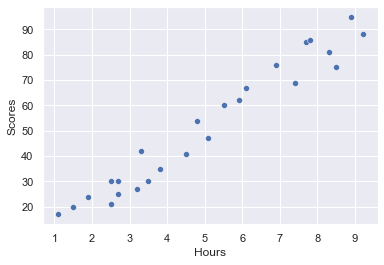

In [5]:
sns.scatterplot(data=df,x='Hours',y='Scores')

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

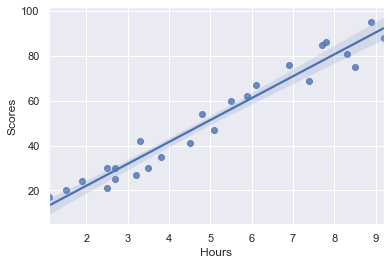

In [6]:
sns.regplot(data=df,x='Hours',y='Scores')

## Now we find out marks using stats model

In [10]:
import statsmodels.api as sm

In [40]:
y=df['Scores']

In [41]:
x1=df['Hours']

In [42]:
x=sm.add_constant(x1)

In [49]:
result=sm.OLS(y,x).fit()

In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           9.13e-17
Time:                        19:10:02   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### So if we now want to check the how many marks a student get when he study for 9.5 hour we can simply put coefficient value in the equation of regression.

In [51]:
marks=2.4837+9.7758*9.25

In [52]:
print(marks)

92.90985
